<a href="https://colab.research.google.com/github/Shalin-Chakraborty/Encryptix-Internship/blob/main/Encryptix_Task_3_CUSTOMER_CHURN_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Kaggle preinstallation

In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"shalinchakraborty","key":"52d2674e436fdec72bb71750f6ca42f1"}'}

In [ ]:
! mkdir ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d shantanudhakadd/bank-customer-churn-prediction

Dataset URL: https://www.kaggle.com/datasets/shantanudhakadd/bank-customer-churn-prediction
License(s): other
  0% 0.00/262k [00:00<?, ?B/s]
100% 262k/262k [00:00<00:00, 85.1MB/s]


In [ ]:
!unzip bank-customer-churn-prediction.zip

Archive:  bank-customer-churn-prediction.zip
  inflating: Churn_Modelling.csv     


#Import all the required libraries

In [ ]:
!pip install colorama  # Install the colorama module

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.graph_objs import Figure, Choropleth
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split,GridSearchCV
import xgboost as xgb
from sklearn.inspection import permutation_importance
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import warnings
warnings.filterwarnings('ignore')

In [ ]:
rc = {
    "axes.facecolor": "#F8F8F8",
    "figure.facecolor": "#F8F8F8",
    "axes.edgecolor": "#000000",
    "grid.color": "#EBEBE7" + "30",
    "font.family": "serif",
    "axes.labelcolor": "#000000",
    "xtick.color": "#000000",
    "ytick.color": "#000000",
    "grid.alpha": 0.4,
}

sns.set(rc=rc)
palette = ['#302c36', '#037d97', '#E4591E', '#C09741',
           '#EC5B6D', '#90A6B1', '#6ca957', '#D8E3E2']

from colorama import Style, Fore
blk = Style.BRIGHT + Fore.BLACK
mgt = Style.BRIGHT + Fore.MAGENTA
red = Style.BRIGHT + Fore.RED
blu = Style.BRIGHT + Fore.BLUE
res = Style.RESET_ALL

plt.style.use('fivethirtyeight')

#Load data

In [ ]:
df=pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
df.shape

(10000, 14)

#Exploratory Data Analysis

### Target Variable Analysis

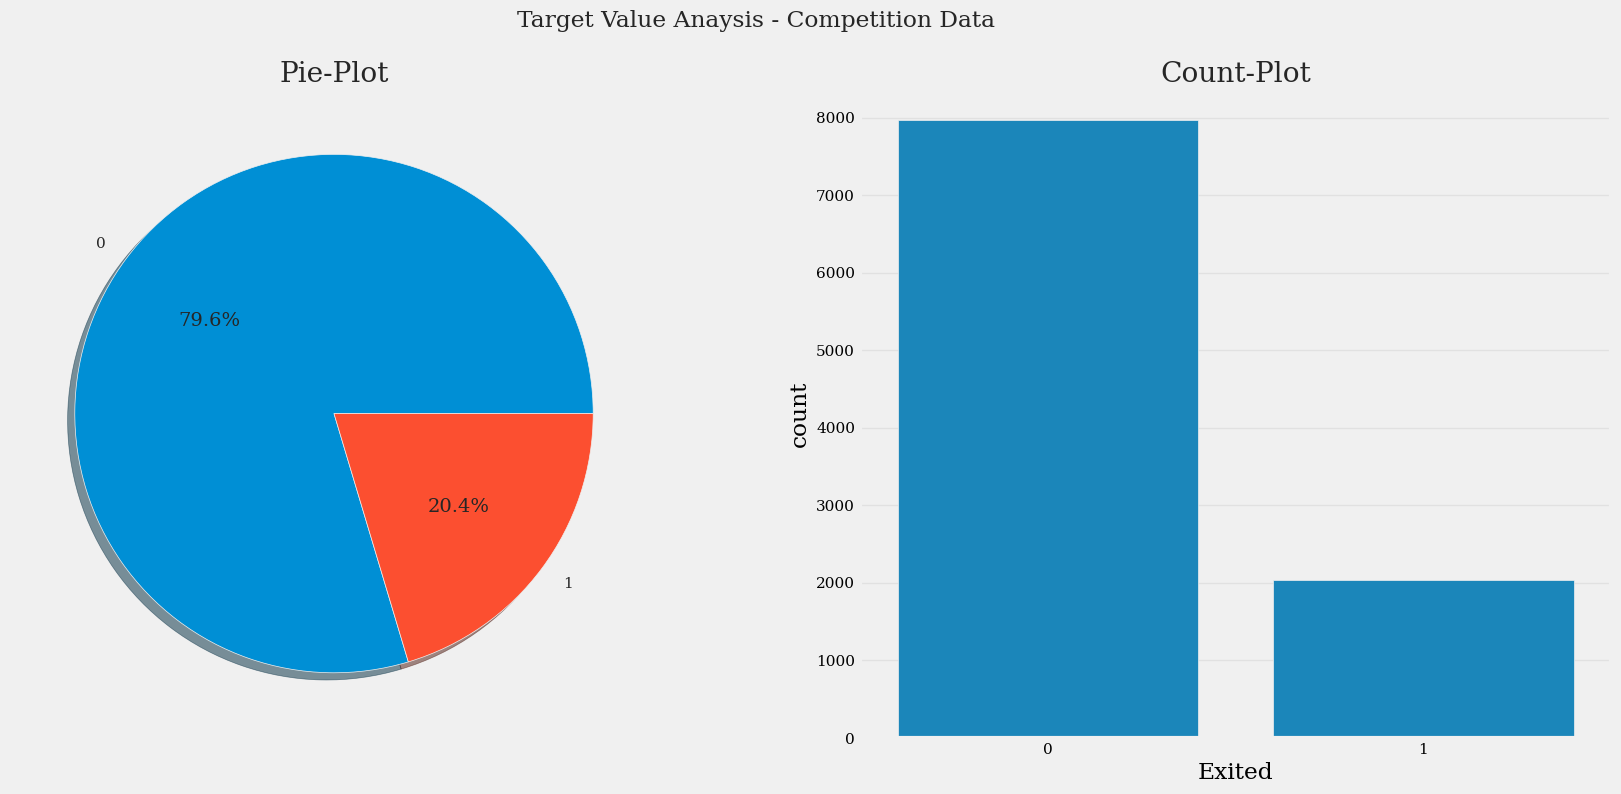

In [ ]:
f,ax=plt.subplots(1,2,figsize=(19,8))
df['Exited'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Pie-Plot')
ax[0].set_ylabel('')
sns.countplot(x='Exited',data=df,ax=ax[1])
ax[1].set_title('Count-Plot')
plt.suptitle('Target Value Anaysis - Competition Data')
plt.show()

##Categorical Variables Analysis

In [ ]:
# Unique value counts for each column
unique_counts = df.nunique()

# Threshold to distinguish continuous and categorical
threshold = 12

continuous_vars = unique_counts[unique_counts > threshold].index.tolist()
categorical_vars = unique_counts[unique_counts <= threshold].index.tolist()

# Removing the 'outcome' from categorical since it's our target variable
if 'outcome' in categorical_vars:
    categorical_vars.remove('outcome')
if 'id' in continuous_vars:
    continuous_vars.remove('id')

print(f"Categorical Variables: {categorical_vars}")
print(f"Continousl/Numerical Variables: {continuous_vars}")

Categorical Variables: ['Geography', 'Gender', 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited']
Continousl/Numerical Variables: ['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Age', 'Balance', 'EstimatedSalary']


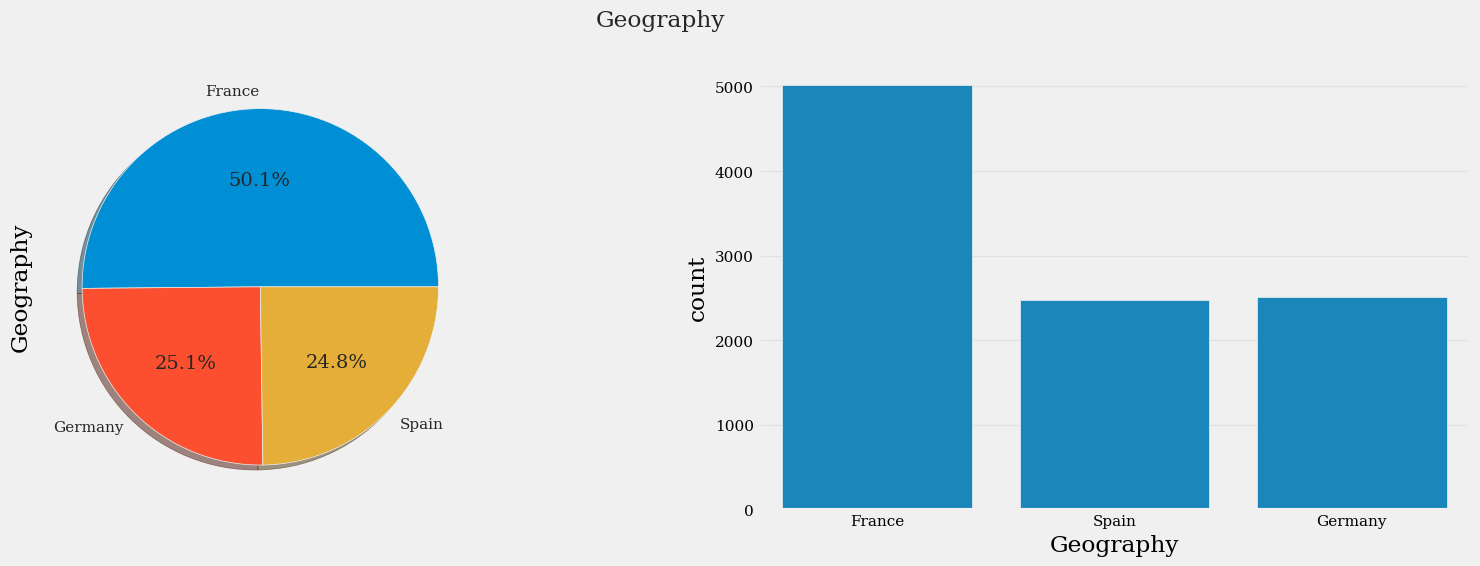

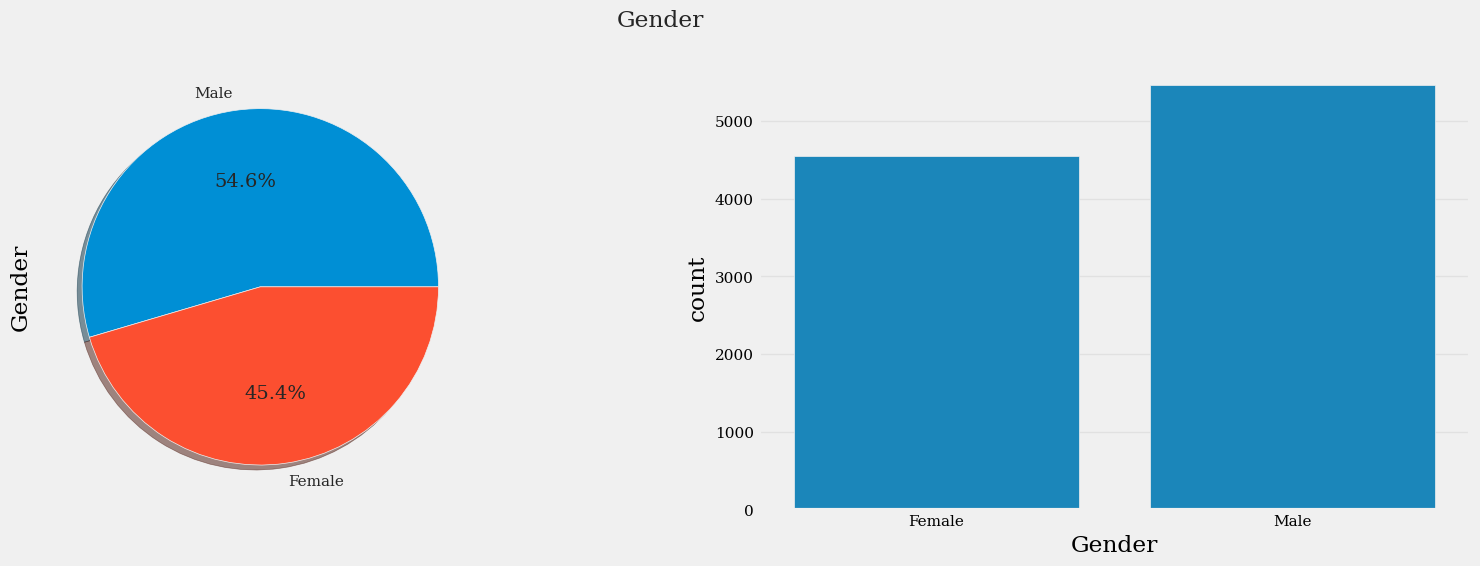

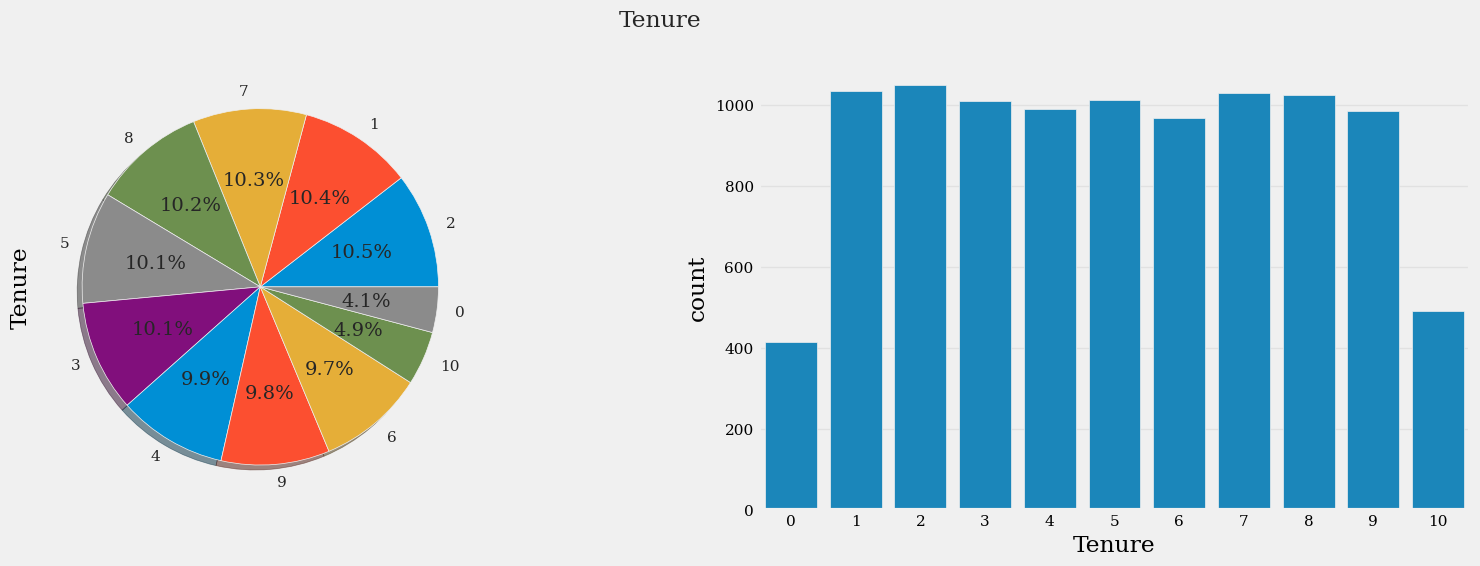

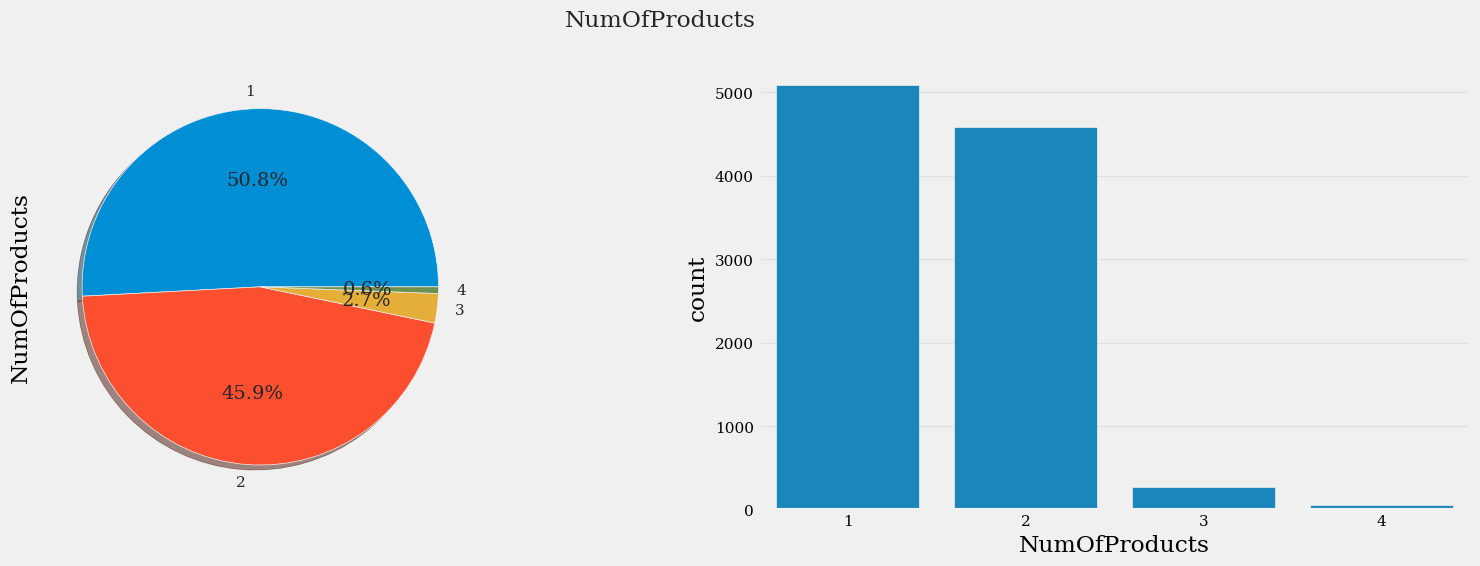

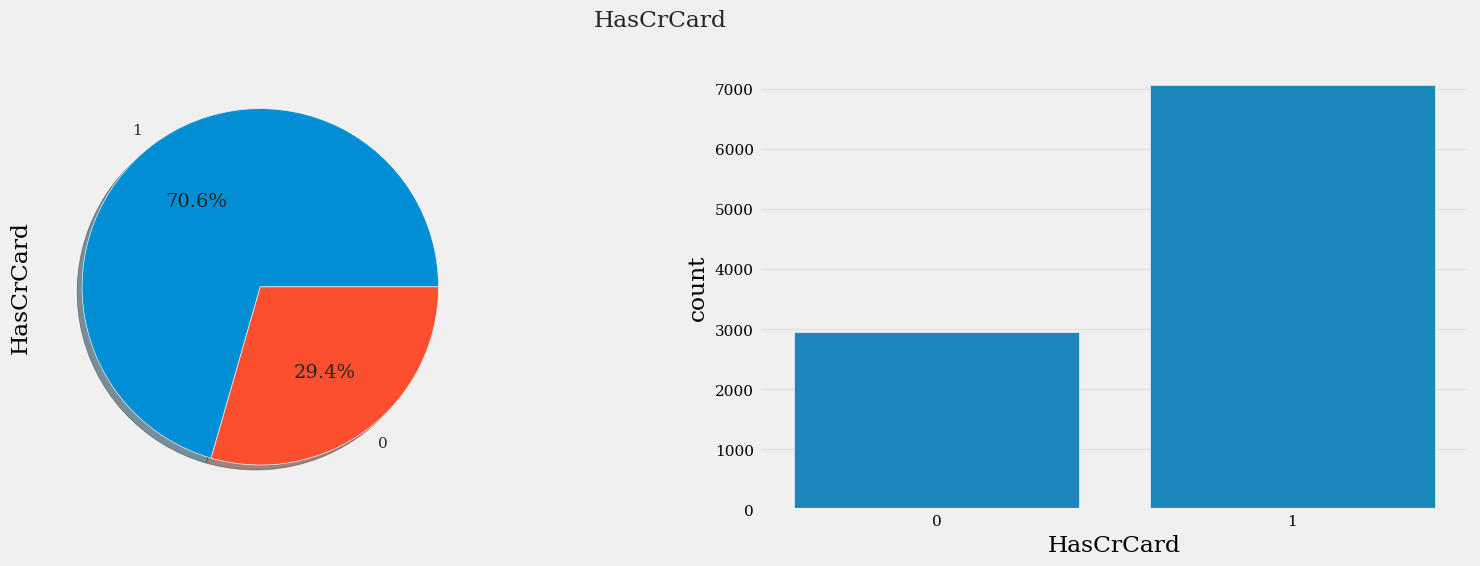

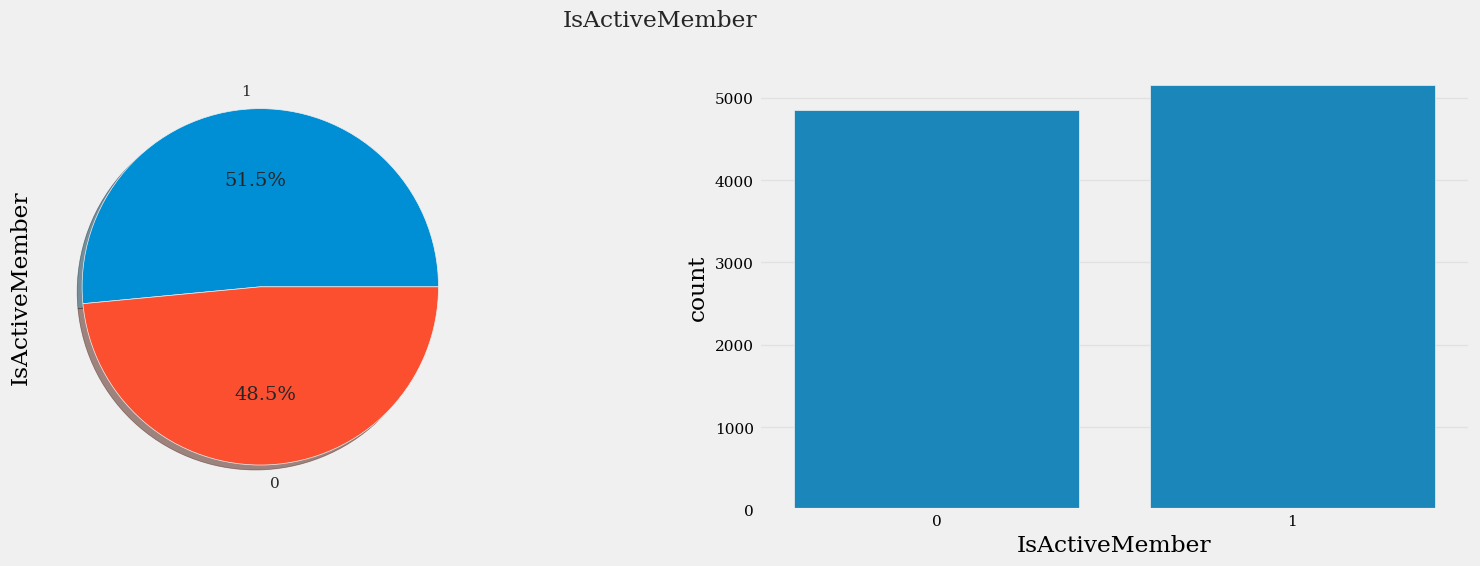

In [ ]:
categorical_vars.remove('Exited')

for column in categorical_vars:
    f,ax=plt.subplots(1,2,figsize=(18,5.5))
    df[column].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
    ax[0].set_ylabel(f'{column}')
    sns.countplot(x=column,data=df,ax=ax[1])
    plt.suptitle(f'{column}')
    plt.show()

In [ ]:
# Count occurrences of each country
state_counts = df["Geography"].value_counts()

# List of European country codes (replace with actual ISO codes if needed)
country_codes = {
    'Germany': 'DEU',  # Germany ISO 3166-1 alpha-3 code
    'Spain': 'ESP',   # Spain ISO 3166-1 alpha-3 code
    'France': 'FRA'   # France ISO 3166-1 alpha-3 code
}

# Map locations using country codes (assuming 'State' column has exact country names)
locations = [country_codes[state] for state in state_counts.index.tolist()]

# Create the choropleth figure
fig = Figure(data=Choropleth(
    locations=locations,
    z=state_counts.values.astype(float),  # Convert count values to float
    locationmode="ISO-3",
    colorscale="turbo"
))

# Update layout with title and Europe geo scope
fig.update_layout(
    title_text="Number of Events in Europe",
    geo_scope="europe"
)

# Display the map
fig.show()


##Numerical Value Analysis

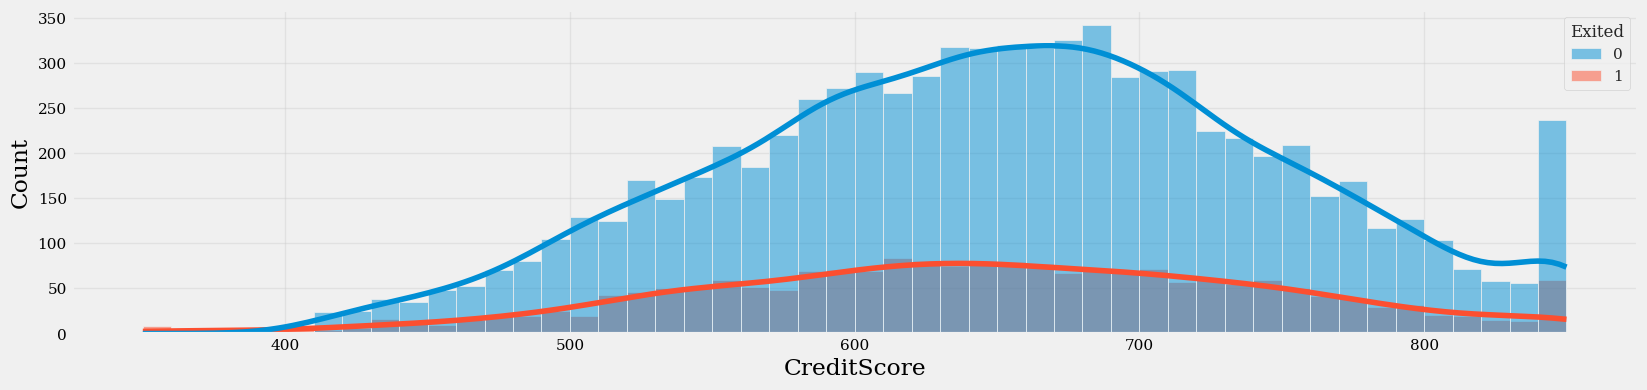

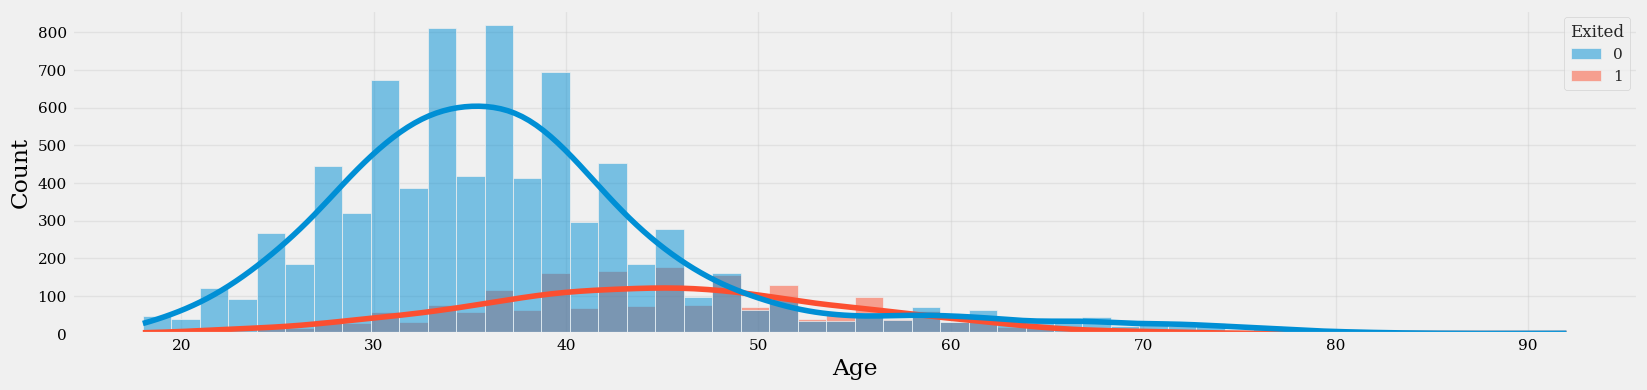

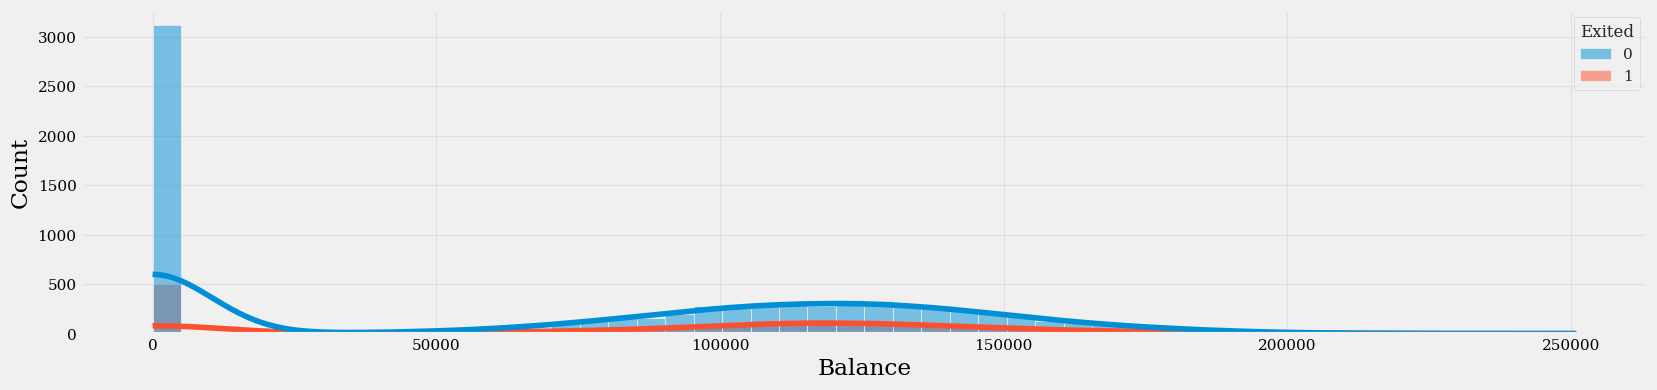

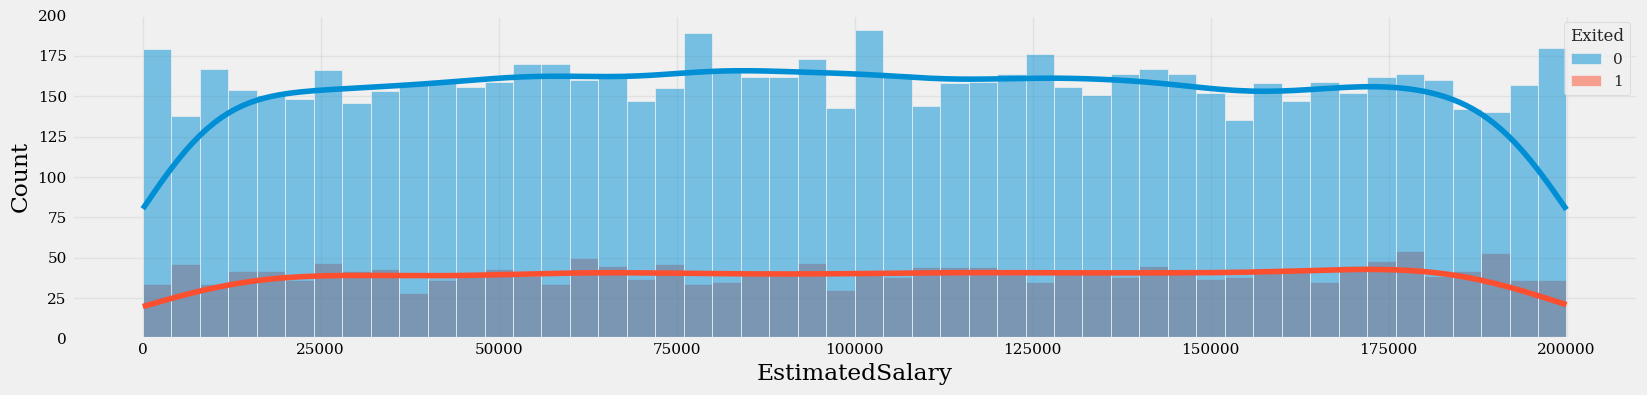

In [ ]:
continuous_vars.remove('CustomerId')
continuous_vars.remove('Surname')
continuous_vars.remove('RowNumber')

for column in continuous_vars:
    fig, ax = plt.subplots(figsize=(18, 4))
    fig = sns.histplot(data=df, x=column, hue="Exited", bins=50, kde=True)
    plt.show()

##Multivariate Analysis

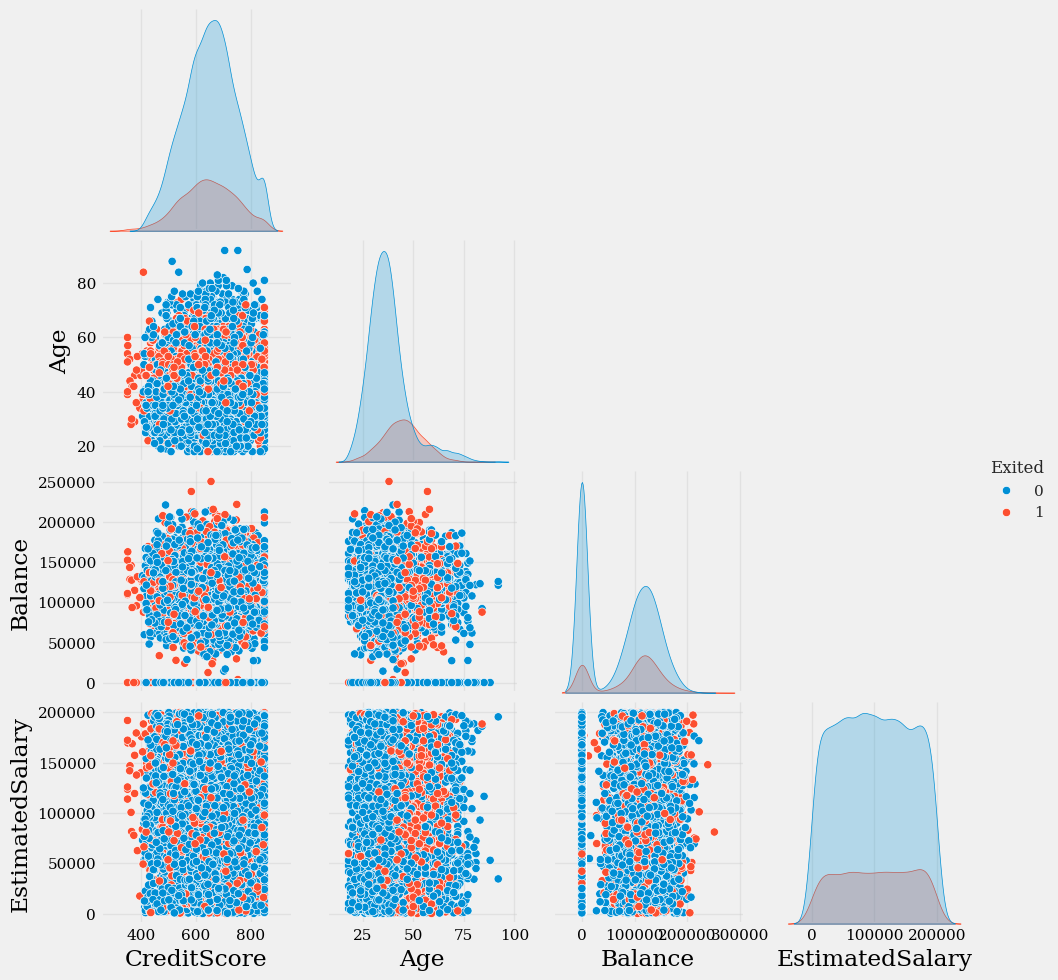

In [ ]:
df3 = df[['CreditScore', 'Age', 'Balance', 'EstimatedSalary', 'Exited']].copy()
sns.pairplot(df3, hue="Exited", corner=True)
plt.show()

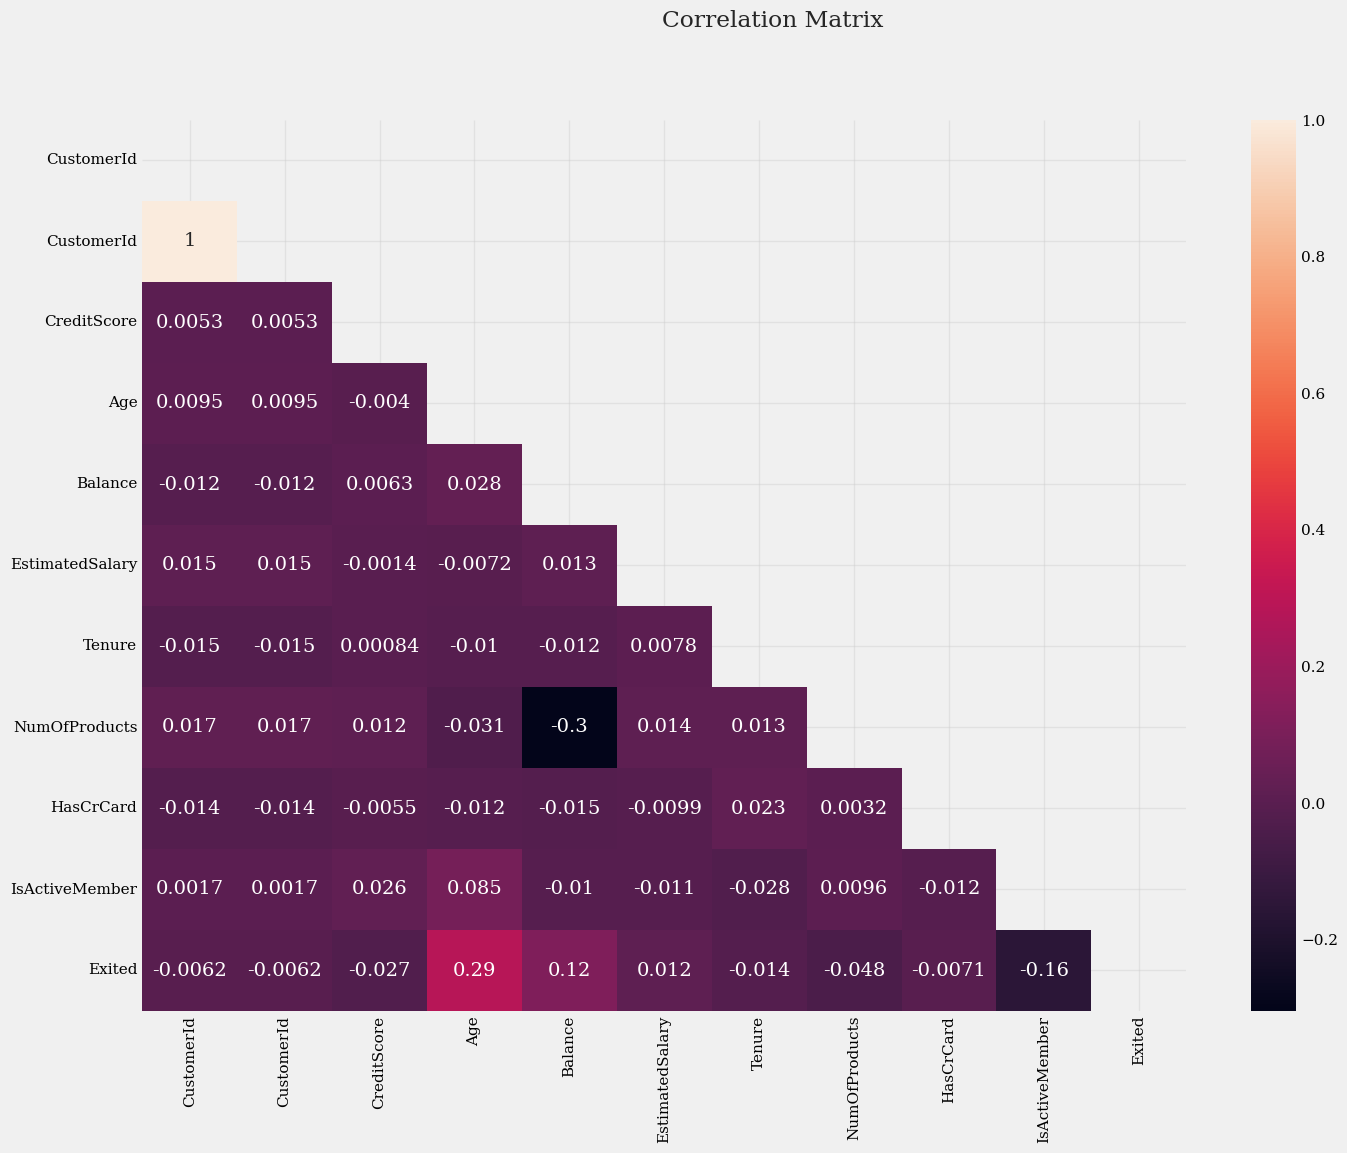

In [ ]:
df4 = df[['CustomerId', 'CustomerId', 'CreditScore', 'Age', 'Balance', 'EstimatedSalary',  'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited']].copy()

corr_matrix=df4.corr()

mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True

f,ax=plt.subplots(figsize=(15,11))
sns.heatmap(corr_matrix, mask=mask, annot=True)
plt.suptitle('Correlation Matrix')
plt.show()

#Data Preprocessing

In [ ]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
X=df.drop(columns='Exited') # droping column from the feature
y=df['Exited']

In [ ]:
X_encoded = pd.get_dummies(X, columns=['Geography', 'Gender', 'IsActiveMember','HasCrCard','NumOfProducts'])

X_encoded.head()

,CreditScore,Age,Tenure,Balance,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,IsActiveMember_0,IsActiveMember_1,HasCrCard_0,HasCrCard_1,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4
0,619,42,2,0.00,101348.88,True,False,False,True,False,False,True,False,True,True,False,False,False
1,608,41,1,83807.86,112542.58,False,False,True,True,False,False,True,True,False,True,False,False,False
2,502,42,8,159660.80,113931.57,True,False,False,True,False,True,False,False,True,False,False,True,False
3,699,39,1,0.00,93826.63,True,False,False,True,False,True,False,True,False,False,True,False,False
4,850,43,2,125510.82,79084.10,False,False,True,True,False,False,True,False,True,True,False,False,False


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(8000, 18)
(8000,)
(2000, 18)
(2000,)


In [ ]:
#Create Logistic Regression model
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [ ]:
#Model Score
model_score=model.score(X_train,y_train)
print(model_score)

0.78775


In [ ]:
#Prediction
y_pred=model.predict(X_test)
print(y_pred)

[0 0 0 ... 0 0 0]


In [ ]:
#Accuracy
accuracy=accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 80.05%


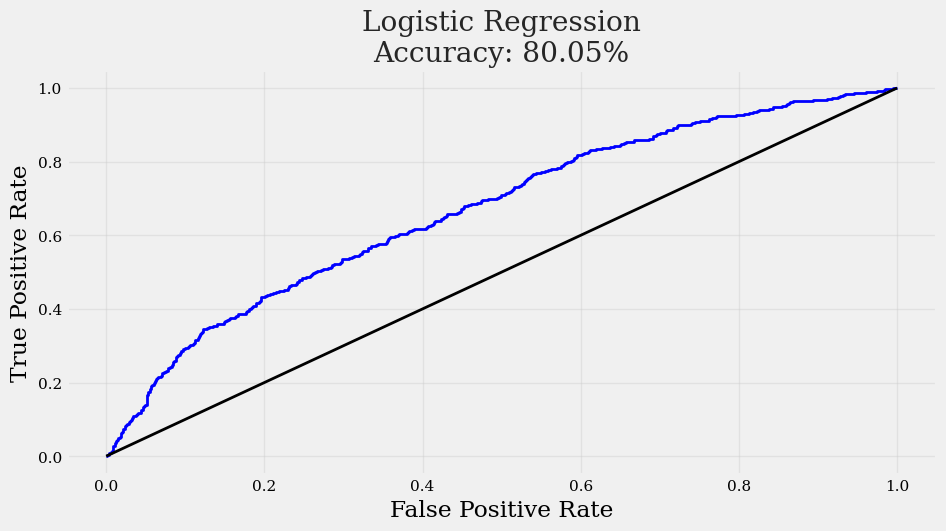

In [ ]:
#Visualization
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.figure(figsize=(10, 5))
plt.plot(fpr, tpr, color='blue', lw=2)
plt.plot([0, 1], [0, 1], color='black', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression\nAccuracy: {:.2f}%'.format(accuracy * 100))
plt.show()

In [ ]:
#Create Random Forest Classifier model
model=RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
#Model score
model.score(X_train,y_train)

1.0

In [ ]:
#Prediction
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
#Length
len(y_pred)

2000

In [ ]:
#Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 87.05%


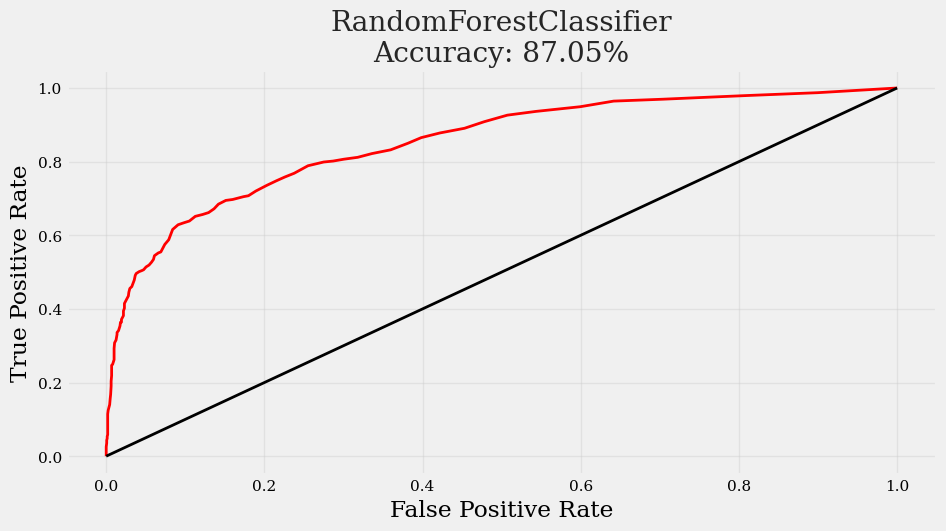

In [ ]:
#Visualization
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.figure(figsize=(10, 5))
plt.plot(fpr, tpr, color='red', lw=2)
plt.plot([0, 1], [0, 1], color='black', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('RandomForestClassifier\nAccuracy: {:.2f}%'.format(accuracy * 100))
plt.show()

In [ ]:
#Create Gradient Boosting model
model=GradientBoostingClassifier()
model.fit(X_train,y_train)

GradientBoostingClassifier()

In [ ]:
#Model Score
model_score=model.score(X_train, y_train)
print(model_score)

0.872875


In [ ]:
#Prediction
y_pred = model.predict(X_test)
print(y_pred)

[0 0 0 ... 1 0 0]


In [ ]:
#Accuracy
accuracy=accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 86.35%


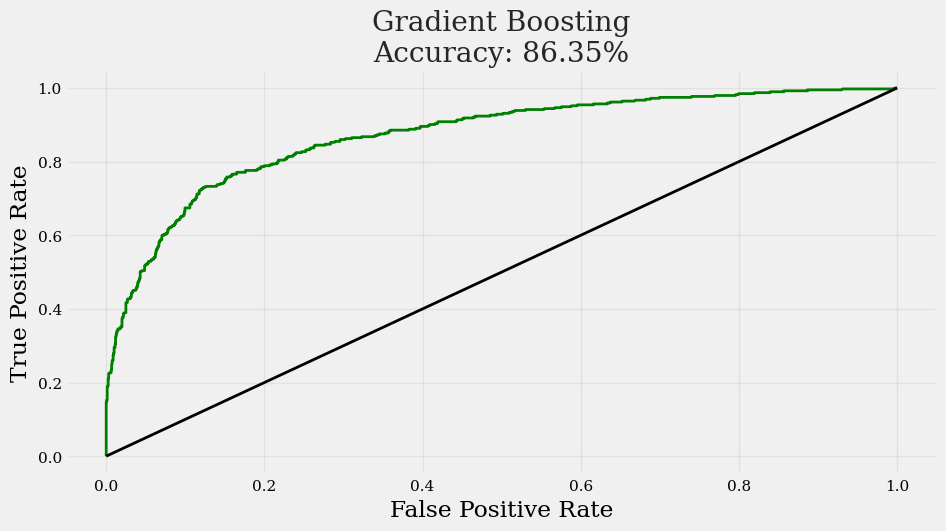

In [ ]:
#Visualization
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.figure(figsize=(10, 5))
plt.plot(fpr, tpr, color='green', lw=2)
plt.plot([0, 1], [0, 1], color='black', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Gradient Boosting\nAccuracy: {:.2f}%'.format(accuracy * 100))
plt.show()

In [ ]:
#Define model names
model_names = ["Random Forest", "Logistic Regression", "Gradient Boosting"]
#Define lists to store accuracies
acc_list = []
#Calculate and store accuracies for each model
for model in [RandomForestClassifier(), LogisticRegression(), GradientBoostingClassifier()]:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    acc_list.append(accuracy)
  #DataFrame to store results
model_results = pd.DataFrame({"Model": model_names,
                              "Accuracy_Score": acc_list})
model_results

,Model,Accuracy_Score
0,Random Forest,0.8665
1,Logistic Regression,0.8005
2,Gradient Boosting,0.8635


<Axes: xlabel='Model', ylabel='Accuracy_Score'>

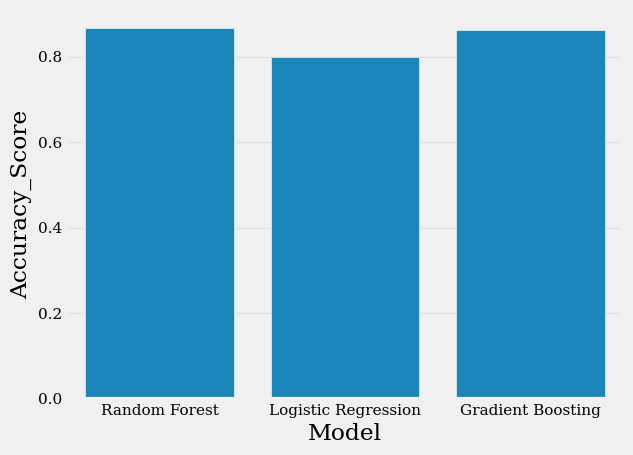

In [ ]:
#Barplot of accuracies
sns.barplot(x="Model", y="Accuracy_Score", data=model_results)